### Imports

In [8]:
from utils import fit_and_evaluate_multiple, load_model_from_json, plot_roc_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from dataloader import load_and_split_data
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

import os

### Run and evaluate models

Evaluating KNeighborsClassifier
Accuracy: 0.8313
Precision: 0.5417
Recall: 0.4483
F1: 0.4906
ROC AUC: 0.8438
Confusion Matrix: 
[[240  22]
 [ 32  26]]

Evaluating RandomForestClassifier
Accuracy: 0.8812
Precision: 0.6852
Recall: 0.6379
F1: 0.6607
ROC AUC: 0.9176
Confusion Matrix: 
[[245  17]
 [ 21  37]]

Evaluating XGBClassifier
Accuracy: 0.8781
Precision: 0.6939
Recall: 0.5862
F1: 0.6355
ROC AUC: 0.9123
Confusion Matrix: 
[[247  15]
 [ 24  34]]

Evaluating LogisticRegression
Accuracy: 0.8688
Precision: 0.6538
Recall: 0.5862
F1: 0.6182
ROC AUC: 0.9029
Confusion Matrix: 
[[244  18]
 [ 24  34]]

Evaluating DummyClassifier
Accuracy: 0.8187
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
ROC AUC: 0.5000
Confusion Matrix: 
[[262   0]
 [ 58   0]]



c:\Users\Willi\miniconda3\envs\segnet\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


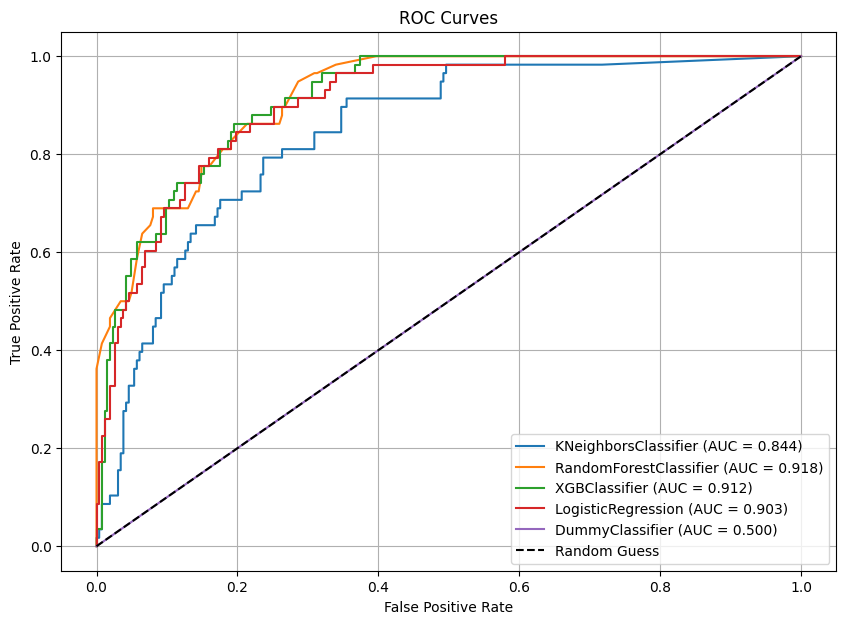

In [11]:
# Load models from json files
knn = load_model_from_json(KNeighborsClassifier, 'output/best_params/knn_best_params.json')
rf = load_model_from_json(RandomForestClassifier, 'output/best_params/rf_best.json')
xgb = load_model_from_json(XGBClassifier, 'output/best_params/xgb_best_params.json')

log_reg = load_model_from_json(LogisticRegression, 'output/best_params/logreg_best_params.json')

# Create naive classifier
naive_model = DummyClassifier(strategy='most_frequent', random_state=0)

models = [knn, rf, xgb, log_reg, naive_model]

# Load data
X_train, X_test, y_train, y_test = load_and_split_data("data/preprocessed_dataset.csv", 
                                                       target_column='increase_stock', 
                                                       class_zero='low_bike_demand', 
                                                       test_size=0.2, 
                                                       convert_cat_target=True,
                                                       random_state=0)


# Evaluate all models, and plot ROC curves
results = fit_and_evaluate_multiple(models, X_train, y_train, X_test, y_test, verbose=True)
plot_roc_curves(results)
